# Pattern Sense: Classifying Fabric Patterns using Deep Learning


In [50]:
!pip install -q tensorflow flask pandas scikit-learn pillow

import os, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image


In [51]:
from google.colab import files
uploaded = files.upload()  # upload your dataset zip

# Extract to workspace
for fn in uploaded:
    if fn.endswith('.zip'):
        with zipfile.ZipFile(fn, 'r') as z:
            z.extractall('Data')


Saving imgg_4.jpg to imgg_4 (1).jpg
Saving imgg_5.jpg to imgg_5 (1).jpg
Saving imgg_6.jpg to imgg_6 (1).jpg
Saving imgg_7.jpg to imgg_7 (1).jpg
Saving imgg_8.jpg to imgg_8 (1).jpg
Saving imgg_9.jpg to imgg_9 (1).jpg
Saving imgg_38.jpg to imgg_38 (1).jpg
Saving imgg_39.jpg to imgg_39 (1).jpg
Saving imgg_40.jpg to imgg_40 (1).jpg
Saving imgg_41.jpg to imgg_41 (1).jpg
Saving imgg_42.jpg to imgg_42 (1).jpg
Saving imgg_43.jpg to imgg_43 (1).jpg
Saving imgg_44.jpg to imgg_44 (1).jpg
Saving imgg_45.jpg to imgg_45 (1).jpg
Saving imgg_46.jpg to imgg_46 (1).jpg
Saving imgg_47.jpg to imgg_47 (1).jpg
Saving imgg_48.jpg to imgg_48 (1).jpg
Saving imgg_49.jpg to imgg_49 (1).jpg
Saving imgg_50.jpg to imgg_50 (1).jpg
Saving imgg_51.jpg to imgg_51 (1).jpg
Saving imgg_52.jpg to imgg_52 (1).jpg
Saving imgg_53.jpg to imgg_53 (1).jpg
Saving imgg_54.jpg to imgg_54 (1).jpg
Saving imgg_55.jpg to imgg_55 (1).jpg
Saving imgg_56.jpg to imgg_56 (1).jpg
Saving imgg_57.jpg to imgg_57 (1).jpg
Saving imgg_58.jpg to im

In [58]:
root_dir = 'fabric_dataset/basicpattern_3800'  # Corrected path to the extracted dataset directory
classes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

data = []
for cls in classes:
    folder = os.path.join(root_dir, cls)
    for img in os.listdir(folder):
        data.append([os.path.join(folder, img), cls])

df = pd.DataFrame(data, columns=['filepath','label'])
print(df.label.value_counts())
display(df.head())

label
leaf          380
diamond       380
floral        380
animal        380
paisley       380
polka dots    380
heart         380
chevron       380
stripes       380
check         380
Name: count, dtype: int64


,filepath,label
0,fabric_dataset/basicpattern_3800/leaf/imgg_204...,leaf
1,fabric_dataset/basicpattern_3800/leaf/imgg_116...,leaf
2,fabric_dataset/basicpattern_3800/leaf/imgg_171...,leaf
3,fabric_dataset/basicpattern_3800/leaf/imgg_51.jpg,leaf
4,fabric_dataset/basicpattern_3800/leaf/jmgg_18.jpg,leaf


In [59]:
# Train‑Val‑Test Split

train_df, temp_df = train_test_split(df, stratify=df.label, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, stratify=temp_df.label, test_size=0.5, random_state=42)

print("Train:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))


Train: 2660 Val: 570 Test: 570


In [61]:
#  Image Generators & Augmentation

IMG_SIZE = (224,224)
BATCH = 32

train_gen = ImageDataGenerator(rescale=1./255, rotation_range=15, zoom_range=0.1,
                              horizontal_flip=True).flow_from_dataframe(train_df, x_col='filepath', y_col='label',
                              target_size=IMG_SIZE, batch_size=BATCH, class_mode='categorical')

val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(val_df, x_col='filepath', y_col='label',
                              target_size=IMG_SIZE, batch_size=BATCH, class_mode='categorical')

test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(test_df, x_col='filepath', y_col='label',
                              target_size=IMG_SIZE, batch_size=BATCH, class_mode='categorical', shuffle=False)

Found 2660 validated image filenames belonging to 10 classes.
Found 570 validated image filenames belonging to 10 classes.
Found 570 validated image filenames belonging to 10 classes.


In [63]:
base = ResNet50(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE,3))
x = GlobalAveragePooling2D()(base.output)
x = Dense(256, activation='relu')(x)
out = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base.input, outputs=out)
for layer in base.layers:
    layer.trainable = False

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [64]:
# Train the Model

history = model.fit(train_gen, validation_data=val_gen, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
35/84 ━━━━━━━━━━━━━━━━━━━━ 5:48 7s/step - accuracy: 0.1041 - loss: 2.3570

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1103 - loss: 2.3306

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 725s 9s/step - accuracy: 0.1104 - loss: 2.3302 - val_accuracy: 0.1614 - val_loss: 2.2395
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 699s 8s/step - accuracy: 0.1668 - loss: 2.2438 - val_accuracy: 0.1982 - val_loss: 2.2028
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 720s 9s/step - accuracy: 0.1868 - loss: 2.2147 - val_accuracy: 0.2070 - val_loss: 2.1652
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 685s 8s/step - accuracy: 0.2191 - loss: 2.1912 - val_accuracy: 0.2421 - val_loss: 2.1423
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 714s 9s/step - accuracy: 0.2056 - loss: 2.1650 - val_accuracy: 0.2684 - val_loss: 2.1268
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 684s 8s/step - accuracy: 0.2204 - loss: 2.1382 - val_accuracy: 0.2614 - val_loss: 2.1033
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 685s 8s/step - accuracy: 0.2322 - loss: 2.1159 - val_accuracy: 0.2404 - val_loss: 2.1037
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 692s 8s/step - accuracy: 0.2463 - loss: 2.0951 - val_accuracy: 0.2684 - val_loss: 2.

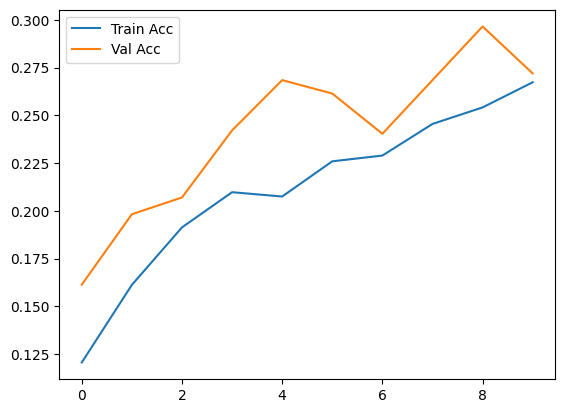

In [65]:
# Plot Performance

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.show()

In [66]:
 # Save the Model

model.save('PatternSense_ResNet50.h5')

In [67]:
# Evaluate on Test Set

test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 128s 7s/step - accuracy: 0.2212 - loss: 2.1086
Test Accuracy: 0.25789472460746765


In [68]:
# Prediction Function

def predict_image(path):
    img = image.load_img(path, target_size=IMG_SIZE)
    arr = np.expand_dims(np.array(img)/255.,0)
    pred = model.predict(arr)
    cls = classes[np.argmax(pred)]
    print("Predicted:", cls)
    plt.imshow(img); plt.title(cls); plt.axis('off')

Saving girl.jpeg to girl.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Predicted: heart


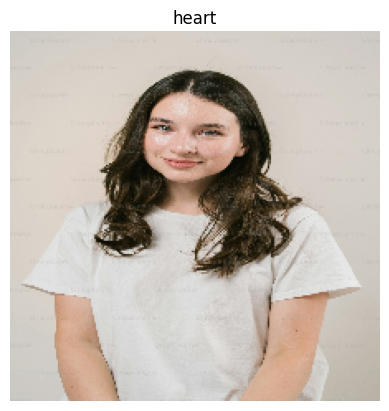

In [74]:
# Upload an image and call:

from google.colab import files
up = files.upload()
for fn in up:
    predict_image(fn)


In [76]:
model.save('PatternSense_ResNet50.h5')

In [78]:
from google.colab import files
files.download('PatternSense_ResNet50.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
pip freeze > requirements.txt


In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # replace 3 with your number of fabric pattern classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.save('fabric_cnn_model.h5')


In [83]:
import tensorflow as tf

model = tf.keras.models.load_model("fabric_cnn_model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # quantization
tflite_model = converter.convert()

with open("fabric_model_compressed.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpucwn_xsl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138162877182800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138162877180688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138162877179152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138162881978704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138162877183376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138162881986192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138162881979856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138162881979664: TensorSpec(shape=(), dtype=tf.resource, name=None)
